In [41]:
import pandas as pd
import glob
df = pd.read_csv("chicago_final.csv", encoding='utf-8', low_memory=False,index_col=0)

In [42]:
# 결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

Case Number                6
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1486
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
F_Date                     0
Time                       0
dtype: int64


In [43]:
df = df.dropna(subset=['Case Number','Location Description'])

In [52]:
print(df.isnull().sum())

Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
F_Date                  0
Time                    0
dtype: int64


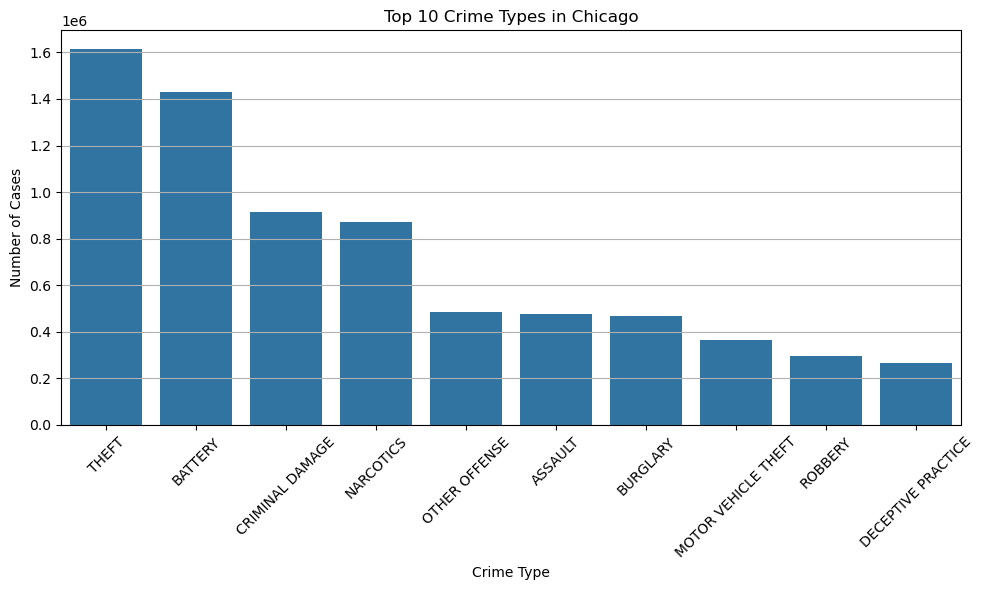

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 범죄 유형별 빈도수 상위 10개
crime_counts = df['Primary Type'].value_counts().head(10)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=crime_counts.index, y=crime_counts.values)
plt.title('Top 10 Crime Types in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

C:\Users\qhwhr\AppData\Local\Temp\ipykernel_16516\500761504.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='Set2')


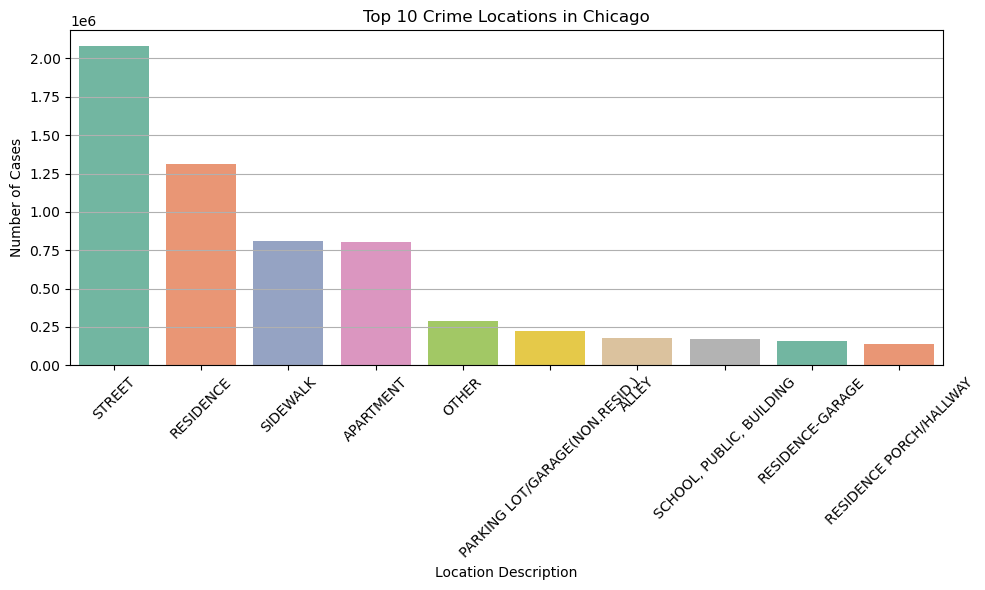

In [46]:
# 발생 장소별 빈도수 상위 10개
location_counts = df['Location Description'].value_counts().head(10)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='Set2')
plt.title('Top 10 Crime Locations in Chicago')
plt.xlabel('Location Description')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()
#STREET, RESIDENCE, SIDEWALK, APARTMENT, OTHER 등 → 실외(길거리, 인도)나 주거지 근처에서 많이 발생하는 경향이 보임

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7835108 entries, 4676906 to 10508692
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Case Number           object 
 1   Date                  object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  float64
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
 21  F_Date                object 
 22  Time                  object 
dtypes: bo

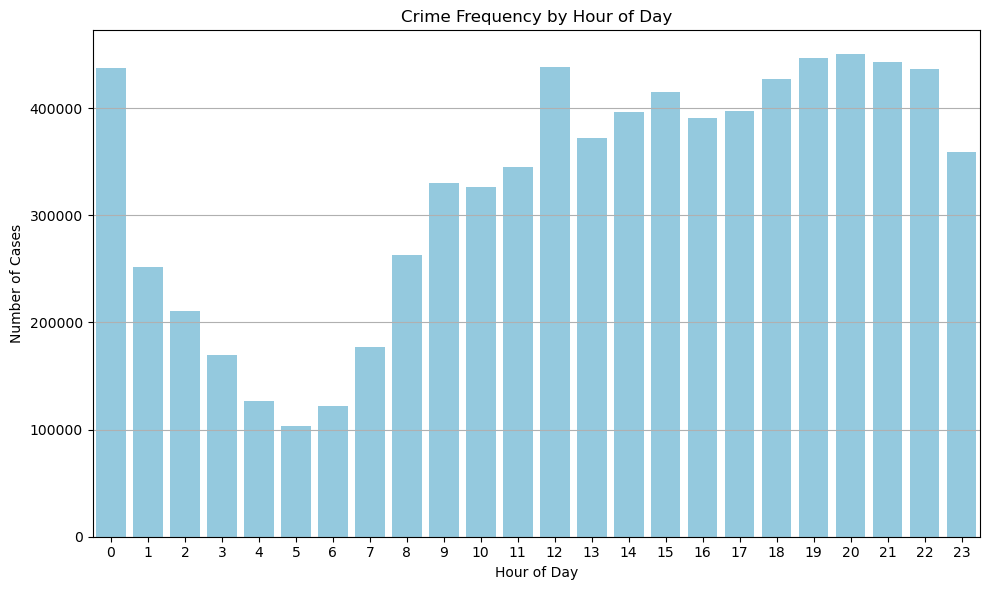

In [53]:
# Time 컬럼이 문자열이면 datetime으로 변환 (오류 안 나게 try)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

# 시간대(Hour) 추출
df['Hour'] = df['Time'].dt.hour
# 시간대별 건수 계산
hourly_counts = df['Hour'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='skyblue')
plt.title('Crime Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#시간대별 범죄 발생 분포를 보면 낮 12시~ 밤12시 사이에 많이 일어나고 새벽~아침은 적게 일어남 

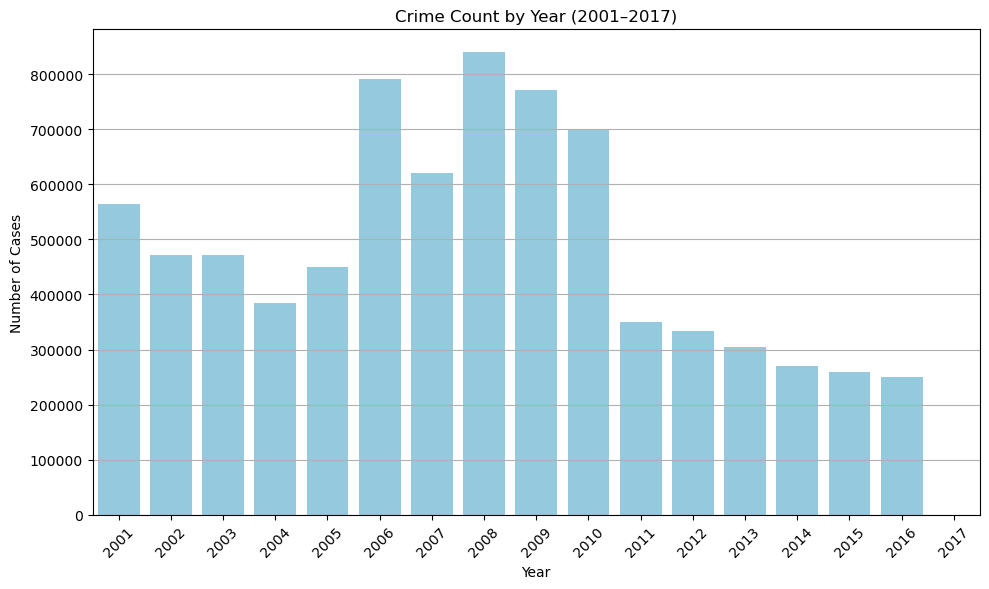

In [54]:
# 연도별 발생 건수 계산
yearly_counts = df['Year'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=yearly_counts.index.astype(int), y=yearly_counts.values, color='skyblue')
plt.title('Crime Count by Year (2001–2017)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#연도별 범죄 추이  2001~2005년까지는 비교적 일정하거나 약간 감소 추세였다가 2006년이후 갑자기증가하고 2011년 이후로는 급격한 감소 경향이 보임

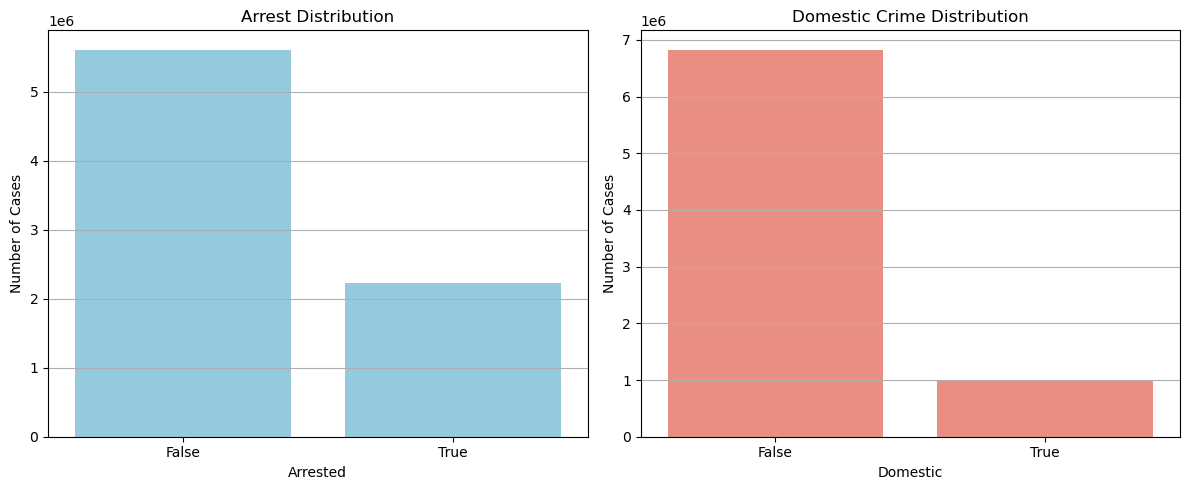

In [55]:
# 체포 여부 빈도수
arrest_counts = df['Arrest'].value_counts()

# 가정폭력 여부 빈도수
domestic_counts = df['Domestic'].value_counts()

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 체포 여부
sns.barplot(x=arrest_counts.index.astype(str), y=arrest_counts.values, ax=axs[0], color='skyblue')
axs[0].set_title('Arrest Distribution')
axs[0].set_xlabel('Arrested')
axs[0].set_ylabel('Number of Cases')
axs[0].grid(axis='y')

# 가정폭력 여부
sns.barplot(x=domestic_counts.index.astype(str), y=domestic_counts.values, ax=axs[1], color='salmon')
axs[1].set_title('Domestic Crime Distribution')
axs[1].set_xlabel('Domestic')
axs[1].set_ylabel('Number of Cases')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()
#체포되지 않은 경우가 압도적으로 많음 , 가정폭력 관련 범죄는 상대적으로 적지만 무시할 수 없는 수준

In [77]:
# 체포 여부 비율 (%)
arrest_ratio = df['Arrest'].value_counts(normalize=True) * 100
print("체포 여부 비율 (%)")
print(arrest_ratio)

# 가정폭력 여부 비율 (%)
domestic_ratio = df['Domestic'].value_counts(normalize=True) * 100
print("\n가정폭력 여부 비율 (%)")
print(domestic_ratio)

체포 여부 비율 (%)
Arrest
False    71.599421
True     28.400579
Name: proportion, dtype: float64

가정폭력 여부 비율 (%)
Domestic
False    87.1316
True     12.8684
Name: proportion, dtype: float64


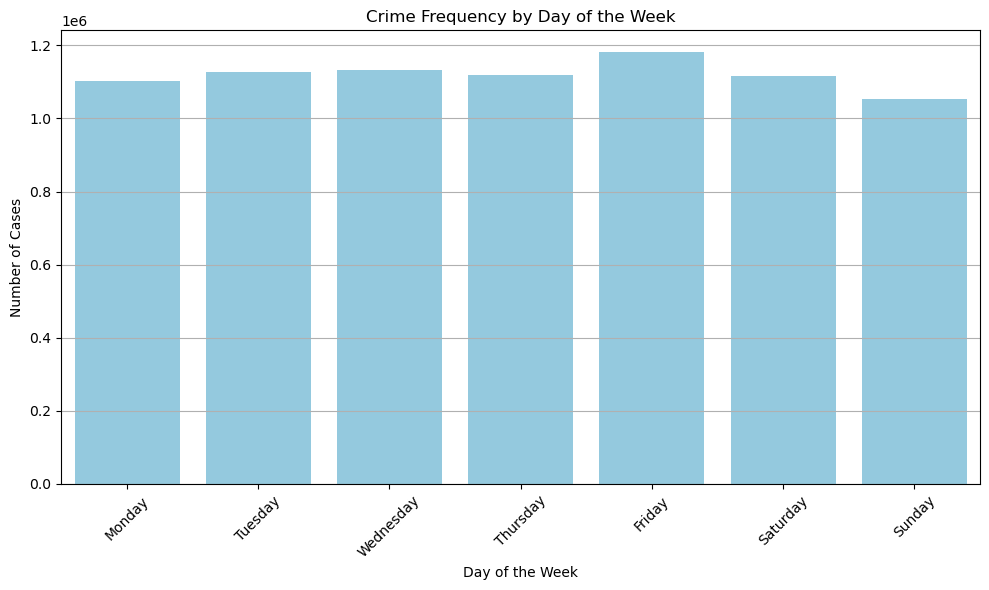

In [56]:
df['F_Date'] = pd.to_datetime(df['F_Date'])

# 요일 추출 (Monday ~ Sunday)
df['Weekday'] = df['F_Date'].dt.day_name()

# 요일별 범죄 건수 집계 (요일 순서 정렬용)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df_cleaned['Weekday'].value_counts().reindex(weekday_order)

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, color='skyblue')
plt.title('Crime Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#금요일만 살짝 높고, 나머지 요일은 큰 차이 없음 일요일은 가장 낮은 편 ,전체적으로는 요일 간 격차가 크지 않음

In [39]:
# 요일별 평균 범죄 건수 수치 확인
weekday_counts_df = df_cleaned['Weekday'].value_counts().reindex(weekday_order)

# 요일별 건수 출력
weekday_counts_df             

Weekday
Monday       1103536
Tuesday      1126273
Wednesday    1133525
Thursday     1120210
Friday       1181986
Saturday     1116616
Sunday       1052962
Name: count, dtype: int64

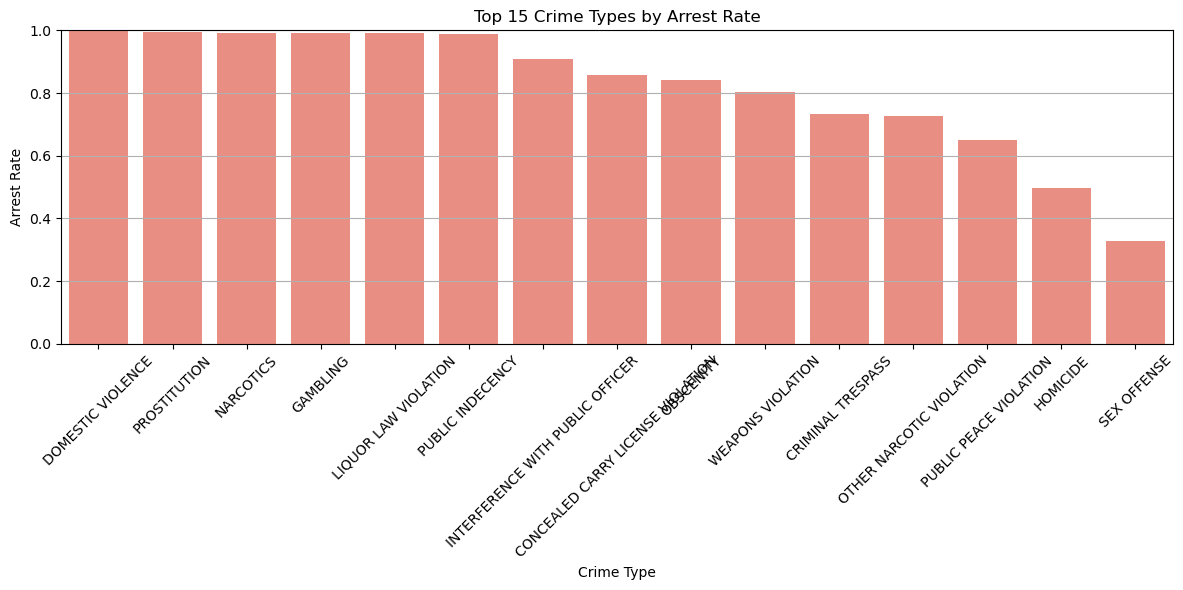

Primary Type
DOMESTIC VIOLENCE                    1.000000
PROSTITUTION                         0.995043
NARCOTICS                            0.992725
GAMBLING                             0.991745
LIQUOR LAW VIOLATION                 0.990068
PUBLIC INDECENCY                     0.987654
INTERFERENCE WITH PUBLIC OFFICER     0.908081
CONCEALED CARRY LICENSE VIOLATION    0.857143
OBSCENITY                            0.840764
WEAPONS VIOLATION                    0.802892
CRIMINAL TRESPASS                    0.733783
OTHER NARCOTIC VIOLATION             0.727273
PUBLIC PEACE VIOLATION               0.649979
HOMICIDE                             0.497775
SEX OFFENSE                          0.328015
Name: Arrest, dtype: float64

In [57]:
# 각 범죄 유형(Primary Type)별로 체포율(Arrest 비율)을 계산 , 체포가 잘 되는 범죄 vs 잘 안 되는 범죄 파악

# Primary Type별 체포율 계산
arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)

# 상위 15개만 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=arrest_rate.head(15).index, y=arrest_rate.head(15).values, color='salmon')
plt.title('Top 15 Crime Types by Arrest Rate')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # 체포율은 0~1 사이
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 체포율 수치도 함께 확인
arrest_rate.head(15)

#  PROSTITUTION, NARCOTICS, GAMBLING, LIQUOR LAW VIOLATION 
# 성매매, 마약, 도박, 주류법 위반같은 범죄 체포율이 매우 높음 (이유? 단속 중심 범죄  ,현장체포 , 신고즉시 대응가능 ) 
# INTERFERENCE WITH PUBLIC OFFICER, WEAPONS VIOLATION, OBSCENITY 
#공무원에 대한 간섭, 무기 위반, 음란성같은 범죄 최포율도 높음 (이유? 행위가 명확, 현행범 체포 많음, 공공장소에서 발생)


#이 범죄들은 경찰이 단속/즉시 검거하기 쉬운 범죄가 많음
#특히 가정폭력은 체포율 100%, 대응 시스템이 잘 작동하고 있다는 의미
# 마약, 매춘, 도박, 술법 위반 등은 거의 다 체포됨 → 공공 단속형 범죄

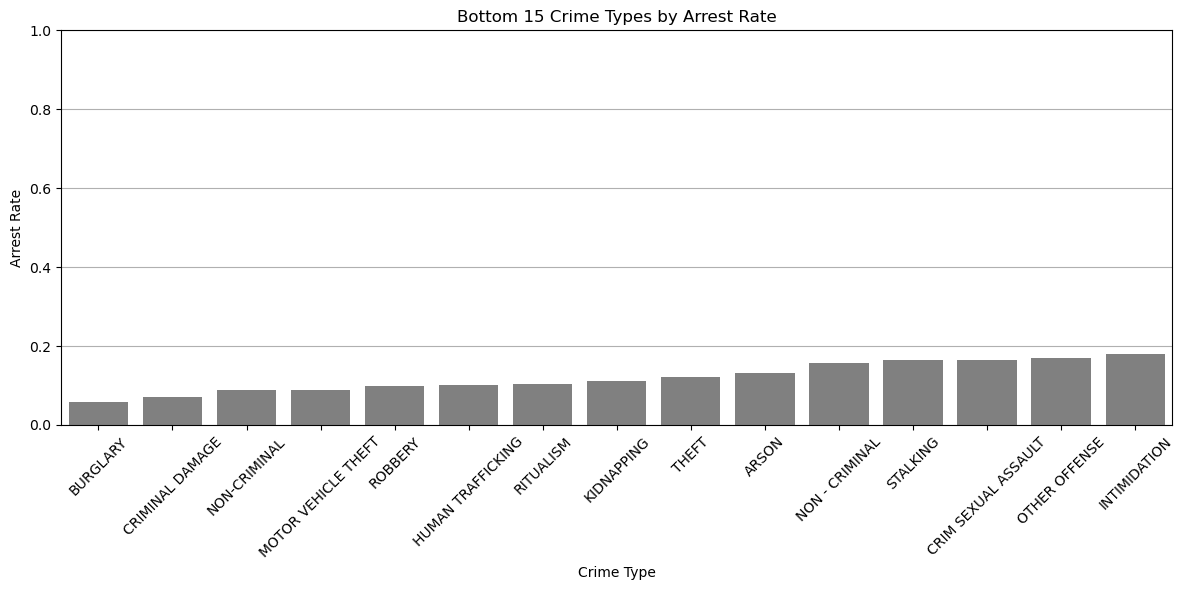

Primary Type
BURGLARY               0.057593
CRIMINAL DAMAGE        0.070986
NON-CRIMINAL           0.087500
MOTOR VEHICLE THEFT    0.089796
ROBBERY                0.099333
HUMAN TRAFFICKING      0.100000
RITUALISM              0.103448
KIDNAPPING             0.110937
THEFT                  0.120806
ARSON                  0.132381
NON - CRIMINAL         0.157895
STALKING               0.163961
CRIM SEXUAL ASSAULT    0.164348
OTHER OFFENSE          0.170066
INTIMIDATION           0.180747
Name: Arrest, dtype: float64

In [58]:
# Primary Type별 체포율 계산
arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=True)

# 하위 15개 추출
arrest_rate_tail = arrest_rate.head(15)

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=arrest_rate_tail.index, y=arrest_rate_tail.values, color='gray')
plt.title('Bottom 15 Crime Types by Arrest Rate')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 수치 출력
arrest_rate_tail

#BURGLARY, THEFT, ROBBERY, ARSON, CRIMINAL DAMAGE 
# 절도, 절도, 강도, 방화, 범죄 피해  (이유? 은밀한 재산 범죄, 사건 후 발견, 도주 흔함)
#STALKING, SEXUAL ASSAULT, INTIMIDATION
# 스토킹, 성폭행, 협박 (이유? 피해자 중심 범죄, 수사 난이도 높음)
#KIDNAPPING, HUMAN TRAFFICKING
#납치, 인신매매 (사건 규모 크고 단서 부족) 

In [60]:
# 가정폭력 건수 중 체포된 경우
domestic_total = df[df['Domestic'] == True]
domestic_arrest_rate = domestic_total['Arrest'].mean()
print("가정폭력 체포율:", domestic_arrest_rate)          
#Primary Type 중 "DOMESTIC VIOLENCE"라는 항목이 일부 데이터셋에 따로 존재하고,그 안에 체포된 케이스만 포함돼 있었을 가능성이 높음

#즉, 전체 가정폭력 사건 중 일부만 특정 Primary Type으로 분류됐고,
#그게 체포율 100%로 보임 

가정폭력 체포율: 0.1998089765168068


In [61]:
# 'DOMESTIC VIOLENCE'라는 Primary Type이 실제로 존재하는지 확인
domestic_violence_df = df[df['Primary Type'] == 'DOMESTIC VIOLENCE']

# 그 중에서 체포된 경우와 안된 경우 개수 확인
domestic_violence_df['Arrest'].value_counts(), domestic_violence_df.shape[0]


(Arrest
 True    2
 Name: count, dtype: int64,
 2)

In [65]:
# 체포율 상위 범죄들의 건수와 체포 여부 확인
suspicious_types = ['PUBLIC INDECENCY', 'OBSCENITY', 'HUMAN TRAFFICKING',
                    'CONCEALED CARRY LICENSE VIOLATION', 'DOMESTIC VIOLENCE']

for crime in suspicious_types:
    subset = df[df['Primary Type'] == crime]
    print(f" {crime}: 총 {len(subset)}건")
    print(subset['Arrest'].value_counts(normalize=True))
    print('-'*50)

 PUBLIC INDECENCY: 총 162건
Arrest
True     0.987654
False    0.012346
Name: proportion, dtype: float64
--------------------------------------------------
 OBSCENITY: 총 471건
Arrest
True     0.840764
False    0.159236
Name: proportion, dtype: float64
--------------------------------------------------
 HUMAN TRAFFICKING: 총 20건
Arrest
False    0.9
True     0.1
Name: proportion, dtype: float64
--------------------------------------------------
 CONCEALED CARRY LICENSE VIOLATION: 총 84건
Arrest
True     0.857143
False    0.142857
Name: proportion, dtype: float64
--------------------------------------------------
 DOMESTIC VIOLENCE: 총 2건
Arrest
True    1.0
Name: proportion, dtype: float64
--------------------------------------------------


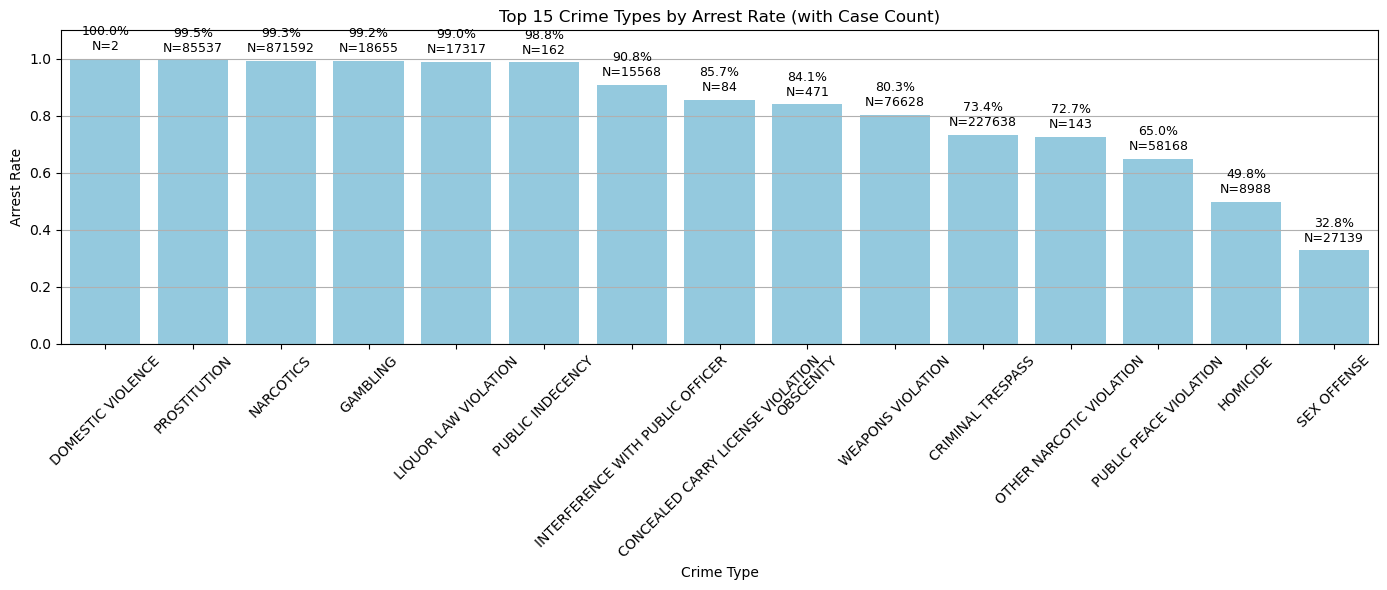

,mean,count
Primary Type,,
DOMESTIC VIOLENCE,1.000000,2
PROSTITUTION,0.995043,85537
NARCOTICS,0.992725,871592
GAMBLING,0.991745,18655
LIQUOR LAW VIOLATION,0.990068,17317
PUBLIC INDECENCY,0.987654,162
INTERFERENCE WITH PUBLIC OFFICER,0.908081,15568
CONCEALED CARRY LICENSE VIOLATION,0.857143,84
OBSCENITY,0.840764,471


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 범죄 유형별 체포율 및 건수 계산
arrest_grouped = df.groupby('Primary Type')['Arrest'].agg(['mean', 'count'])
arrest_grouped = arrest_grouped.sort_values(by='mean', ascending=False).head(15)  # 상위 15개

plt.figure(figsize=(14, 6))
sns.barplot(x=arrest_grouped.index, y=arrest_grouped['mean'], color='skyblue')

# 막대 위에 체포율 + 사례 수 표기
for index, row in arrest_grouped.iterrows():
    plt.text(x=arrest_grouped.index.get_loc(index),
             y=row['mean'] + 0.02,
             s=f"{row['mean']*100:.1f}%\nN={int(row['count'])}",
             ha='center', va='bottom', fontsize=9)

plt.title('Top 15 Crime Types by Arrest Rate (with Case Count)')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
arrest_grouped.head(15)
#NARCOTICS : 마약 단속은 체계적으로 진행, 현장 체포 중심
#PROSTITUTION :	매춘 단속도 거의 현행범 검거 ,즉시 검거 시스템
#GAMBLING, LIQUOR LAW : 도박,주류법 ,공공장소 기반, 경찰 단속에 취약한 구조

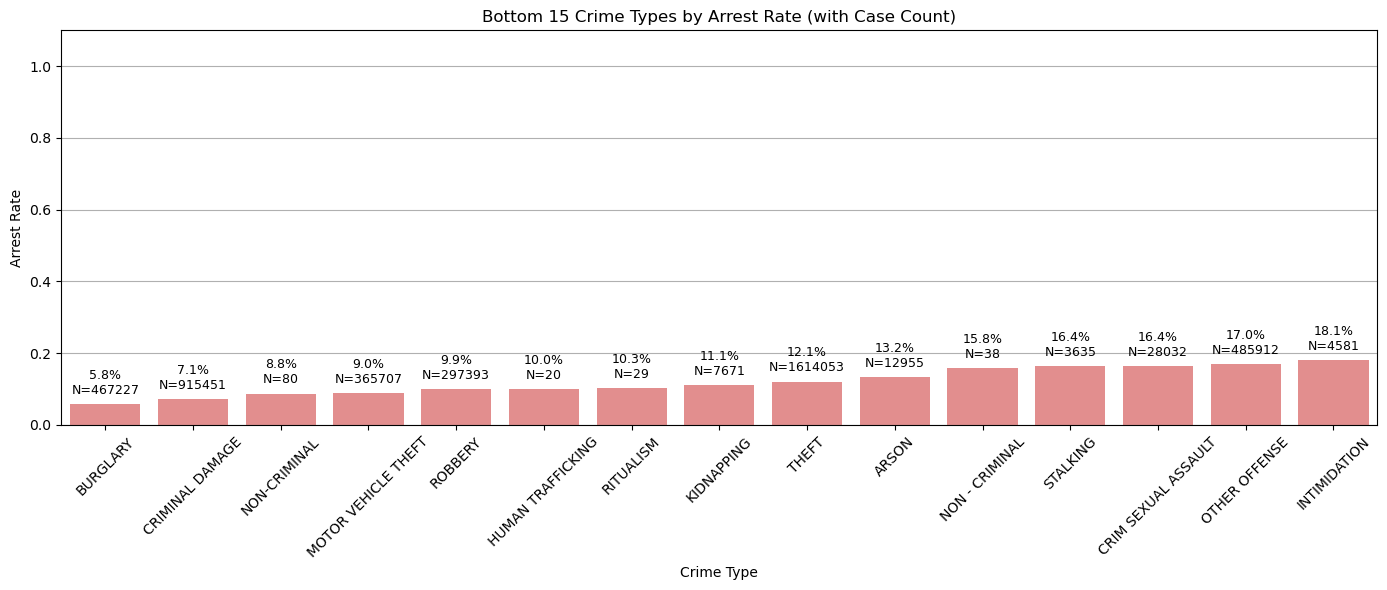

,mean,count
Primary Type,,
BURGLARY,0.057593,467227
CRIMINAL DAMAGE,0.070986,915451
NON-CRIMINAL,0.087500,80
MOTOR VEHICLE THEFT,0.089796,365707
ROBBERY,0.099333,297393
HUMAN TRAFFICKING,0.100000,20
RITUALISM,0.103448,29
KIDNAPPING,0.110937,7671
THEFT,0.120806,1614053


In [67]:
# 체포율 하위 15개 계산
arrest_grouped_tail = df.groupby('Primary Type')['Arrest'].agg(['mean', 'count'])
arrest_grouped_tail = arrest_grouped_tail.sort_values(by='mean', ascending=True).head(15)

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(x=arrest_grouped_tail.index, y=arrest_grouped_tail['mean'], color='lightcoral')

# 막대 위에 체포율 + 사례 수 표기
for index, row in arrest_grouped_tail.iterrows():
    plt.text(x=arrest_grouped_tail.index.get_loc(index),
             y=row['mean'] + 0.02,
             s=f"{row['mean']*100:.1f}%\nN={int(row['count'])}",
             ha='center', va='bottom', fontsize=9)

plt.title('Bottom 15 Crime Types by Arrest Rate (with Case Count)')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
arrest_grouped_tail

#THEFT(일반 재산범죄 ,침입 없이 물건 훔침 ): 가장 많은 범죄이면서도 체포율 낮음 
#CRIMINAL DAMAGE: 다른 사람의 재산, 시설, 차량, 공공물건 등을 파손하거나 훼손하는 행위
#BURGLARY(침입 후 물건 훔침 , MOTOR VEHICLE THEFT, ROBBERY (자동차 도난,강도) : 피해는 크고 체포는 어려운 구조   

In [76]:
df2001=df[df['Year']==2001]
df2001

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,F_Date,Time,Hour,Weekday
ID,,,,,,,,,,,,,,,,,,,,,
4791194,HM403711,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,531,...,1829375.0,2001.0,08/29/2006 03:46:28 AM,41.687020,-87.608445,"(41.687020002, -87.60844523)",2001-01-01,1900-01-01 11:00:00,11,Monday
4803028,HM414773,2001-01-01 00:00:00,055XX S TRIPP AVE,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,813,...,1867199.0,2001.0,10/03/2006 05:10:58 AM,41.791519,-87.729099,"(41.791518681, -87.729098793)",2001-01-01,1900-01-01 00:00:00,0,Monday
4803606,HM417252,2001-01-01 00:00:00,032XX S OAKLEY AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,913,...,1882962.0,2001.0,06/25/2006 04:27:37 AM,41.834523,-87.682642,"(41.834522994, -87.682642417)",2001-01-01,1900-01-01 00:00:00,0,Monday
4809221,HM423298,2001-06-16 08:00:00,063XX S DAMEN AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,726,...,1862580.0,2001.0,08/05/2006 04:48:25 AM,41.778540,-87.674036,"(41.778539988, -87.674035599)",2001-06-16,1900-01-01 08:00:00,8,Saturday
4811727,HM402010,2001-06-01 08:00:00,054XX W IOWA ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1524,...,1905504.0,2001.0,06/22/2006 03:55:52 AM,41.896809,-87.762472,"(41.896808547, -87.762472408)",2001-06-01,1900-01-01 08:00:00,8,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771567,HM384838,2001-01-01 00:01:00,048XX N PAULINA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2032,...,1932578.0,2001.0,06/07/2006 04:08:49 AM,41.970614,-87.670922,"(41.970613961, -87.670922333)",2001-01-01,1900-01-01 00:01:00,0,Monday
4774932,HM388575,2001-03-31 00:00:00,010XX E 73RD ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,324,...,1856867.0,2001.0,06/10/2006 03:42:52 AM,41.762408,-87.599211,"(41.762408071, -87.599210982)",2001-03-31,1900-01-01 00:00:00,0,Saturday
4776541,HM386979,2001-08-15 12:00:00,029XX W 58TH ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,824,...,1865991.0,2001.0,06/13/2006 03:45:29 AM,41.788037,-87.698249,"(41.788037177, -87.698249401)",2001-08-15,1900-01-01 12:00:00,12,Wednesday
